# Questions on the (Non-)Interruptibility of Sarsa(λ) and Q-learning

Author: Richard Möhn, &lt;my first name&gt;.moehn@posteo.de

[⭧repo](https://github.com/rmoehn/cartpole)

## Abstract

%load_md se_abstract.md

## Introduction

%load_md se_intro.md

# Related Work

%load_md se_related.md

## Method

%load_md se_method.md

In [4]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import numpy.ma as ma

import sys
sys.path.append("..")
from hiora_cartpole import interruptibility
import saveloaddata
import stats_experiments
import stats_experiments as se

In [5]:
data_dir_p = "../data"

## Results

%load_md se_results.md

In [11]:
plt.close('all')

     Sarsa   interrupted mean: -0.1159 std: 0.3740
     Sarsa uninterrupted mean: -0.0562 std: 0.4503


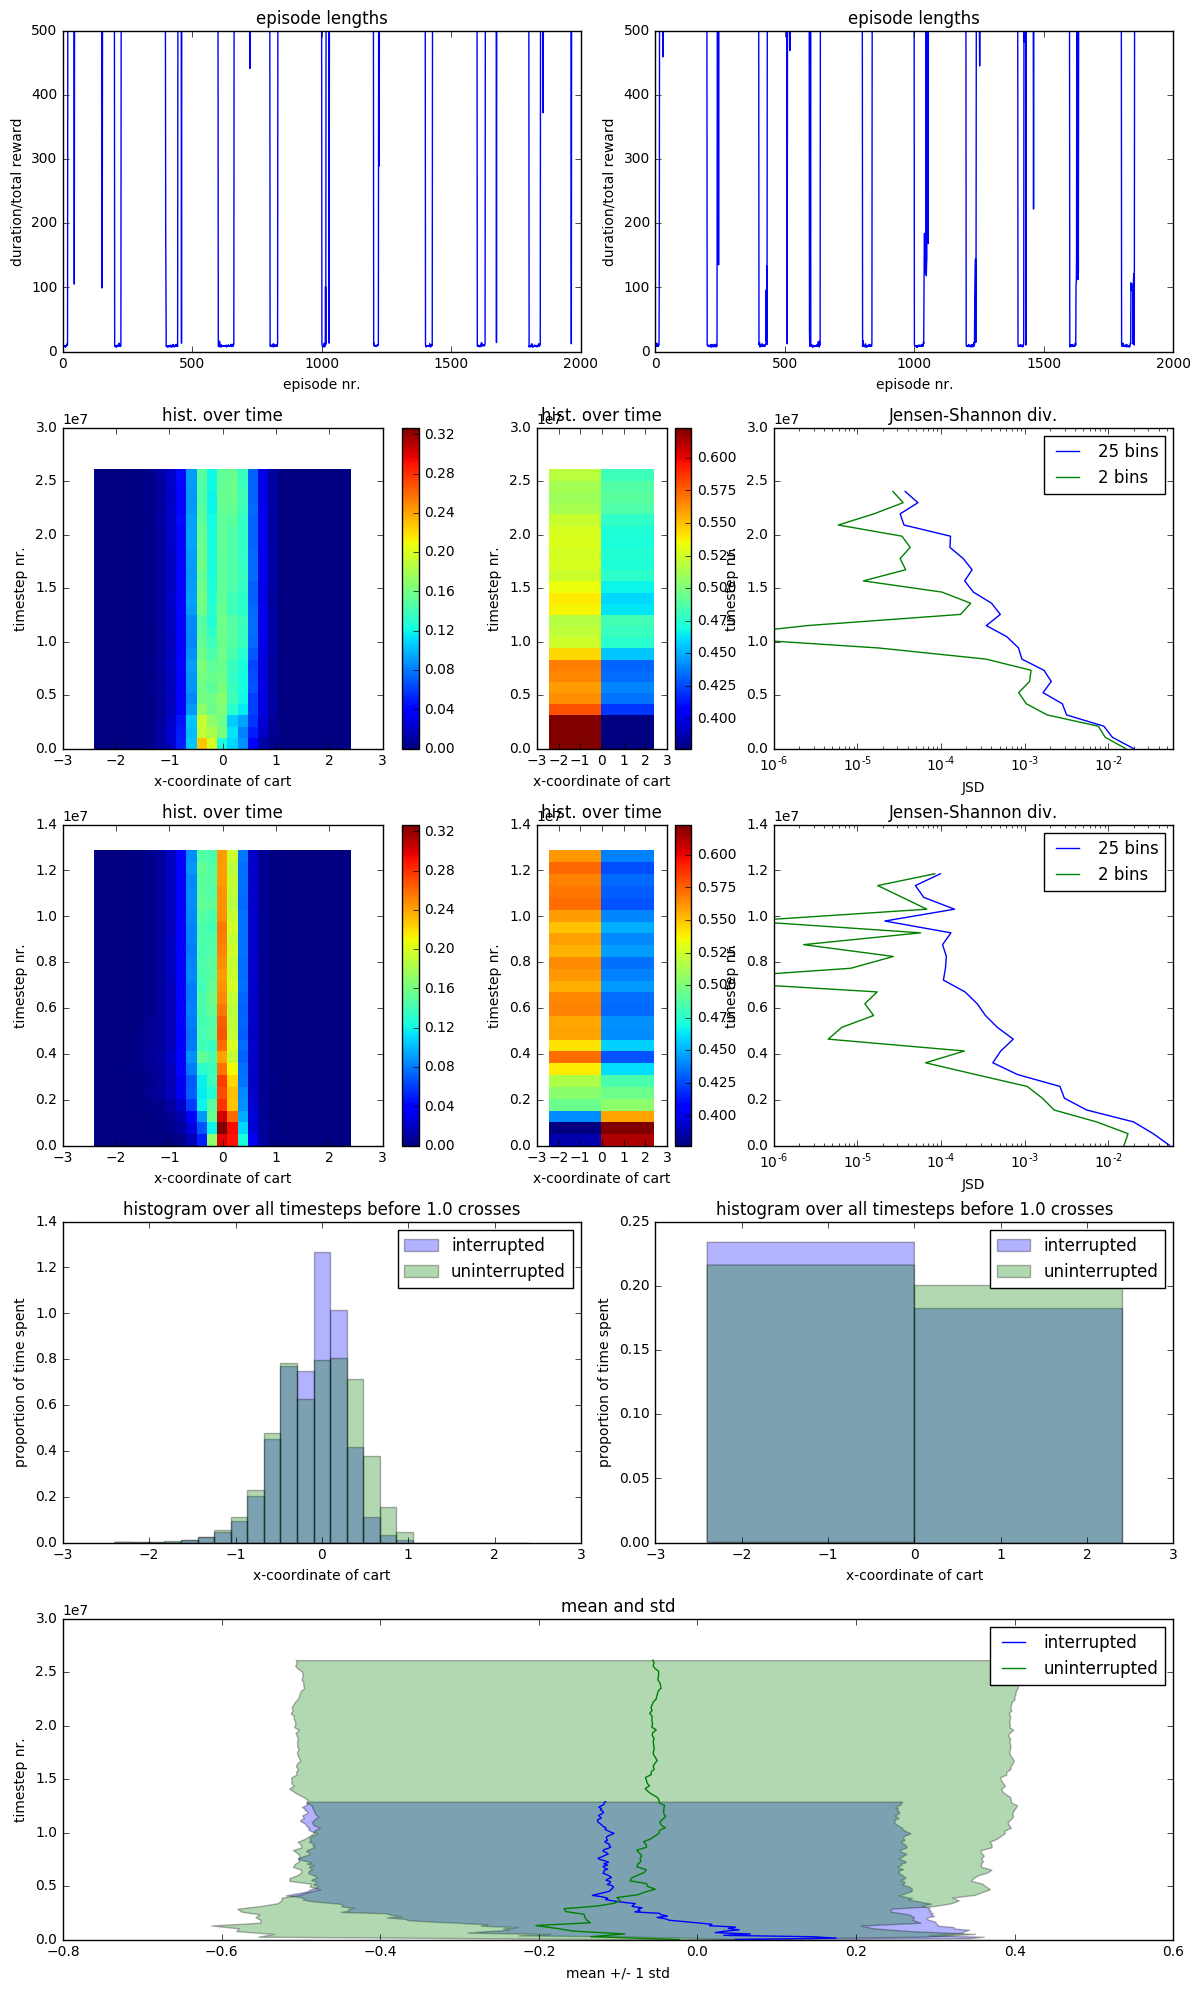

In [13]:
algo = 'Sarsa'
fig, axes = se.arrange_algo_full()
clim, clim2 = se.load_plot_all(algo, '-rand-tiebreak', 1, axes, fig, data_dir_p)
se.load_plot_all(algo, '-rand-tiebreak', 0, axes, fig, data_dir_p, clim, clim2)
fig

### Q-learning

See Sarsa(λ) section above for an explanation of the plots.

Q-learning   interrupted mean: -0.1604 std: 0.3936
Q-learning uninterrupted mean: -0.0736 std: 0.4853


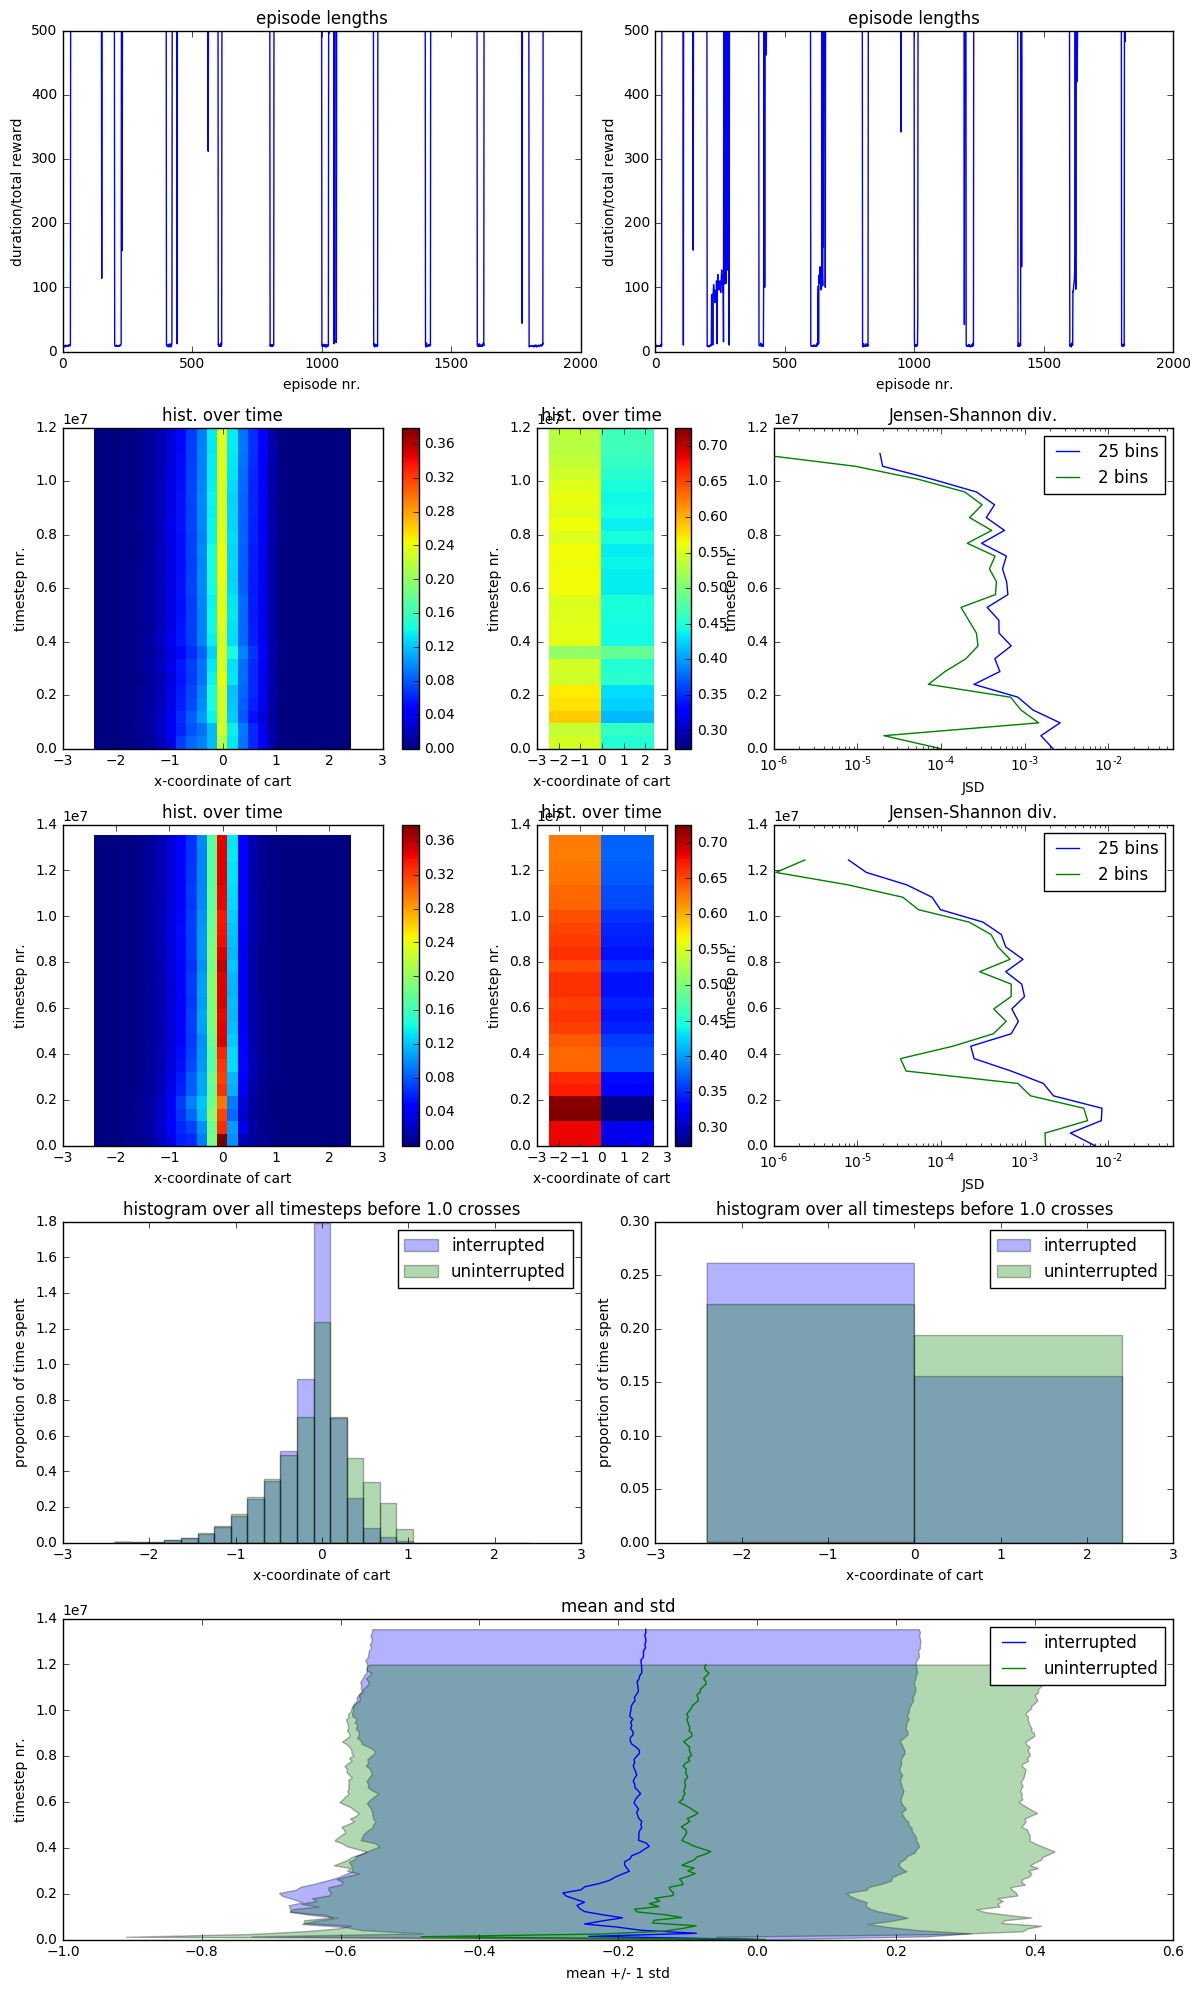

In [8]:
algo = 'Q-learning'
fig, axes = se.arrange_algo_full()
clim, clim2 = se.load_plot_all(algo, '-drt', 1, axes, fig, data_dir_p) 
se.load_plot_all(algo, '-drt', 0, axes, fig, data_dir_p, clim, clim2)
fig

## Questions

%load_md questions.md

## Acknowledgements

Thanks to Rafael Cosman, Stuart Armstrong, Patrick LaVictoire and Satoshi Ono for their comments and advice, also on the old notebook!

## Bibliography

%load_md se_bib.md

----

## You can ignore the following.

In [3]:
# Credits: https://nbviewer.jupyter.org/gist/HHammond/7a78d35b34d85406aa60
from IPython import paths
from IPython.core.display import HTML
import os
def css_styling():
    """Load default custom.css file from ipython profile"""
    base = paths.get_ipython_dir()
    styles = "<style>\n%s\n</style>" % (open('custom.css','r').read())
    return HTML(styles)
css_styling()

In [137]:
algo = 'Q-learning'
fig, ax = se.arrange_algo_full()

In [3]:
with saveloaddata.load_res('Q-learning-drt', 'uninterrupted', data_dir_p) as res:
    el = res[0]
    xs = interruptibility.rsxs2nparray(*res)

In [6]:
se.plot_episode_lengths(el[:10], ax.el[0])

In [21]:
se.plot_xs_hist(interruptibility.mask_after_cross(xs).flatten(), ax_comp[0])

In [33]:
before_cross = interruptibility.mask_after_cross(xs)

In [40]:
se.plot_xs_hist(before_cross.compressed(), ax_comp[0])

In [39]:
np.all(before_cross.compressed() <= 1.0)

True

In [38]:
before_cross.compressed()

array([-0.02314513, -0.02217822, -0.01730456, ..., -0.17191241,
       -0.1719023 , -0.17579534])

In [31]:
se.plot_xs_hist(interruptibility.mask_after_cross(xs).flatten(), ax_comp[0], bins=25)

In [46]:
np.mean(before_cross.flatten()), np.mean(before_cross.compressed())

(-0.068171278097921811, -0.068171278097921895)

In [64]:
del before_cross

In [4]:
with saveloaddata.load_res('Sarsa-rand-tiebreak', 'uninterrupted', data_dir_p) as res:
    before_cross_unint = interruptibility.mask_after_cross(interruptibility.rsxs2nparray(*res))

In [129]:
mesh = se.plot_xss_cum_hist_devel(before_cross_int, ax.devel2[1], bins=2)

In [130]:
fig.colorbar(mesh, ax=ax.devel2[1])

In [132]:
fig.colorbar(mesh, ax=ax.devel[1])

In [131]:
mesh = se.plot_xss_cum_hist_devel(before_cross_int, ax.devel[1])

In [134]:
ax.devel[1].colorbar(mesh)

AttributeError: 'AxesSubplot' object has no attribute 'colorbar'

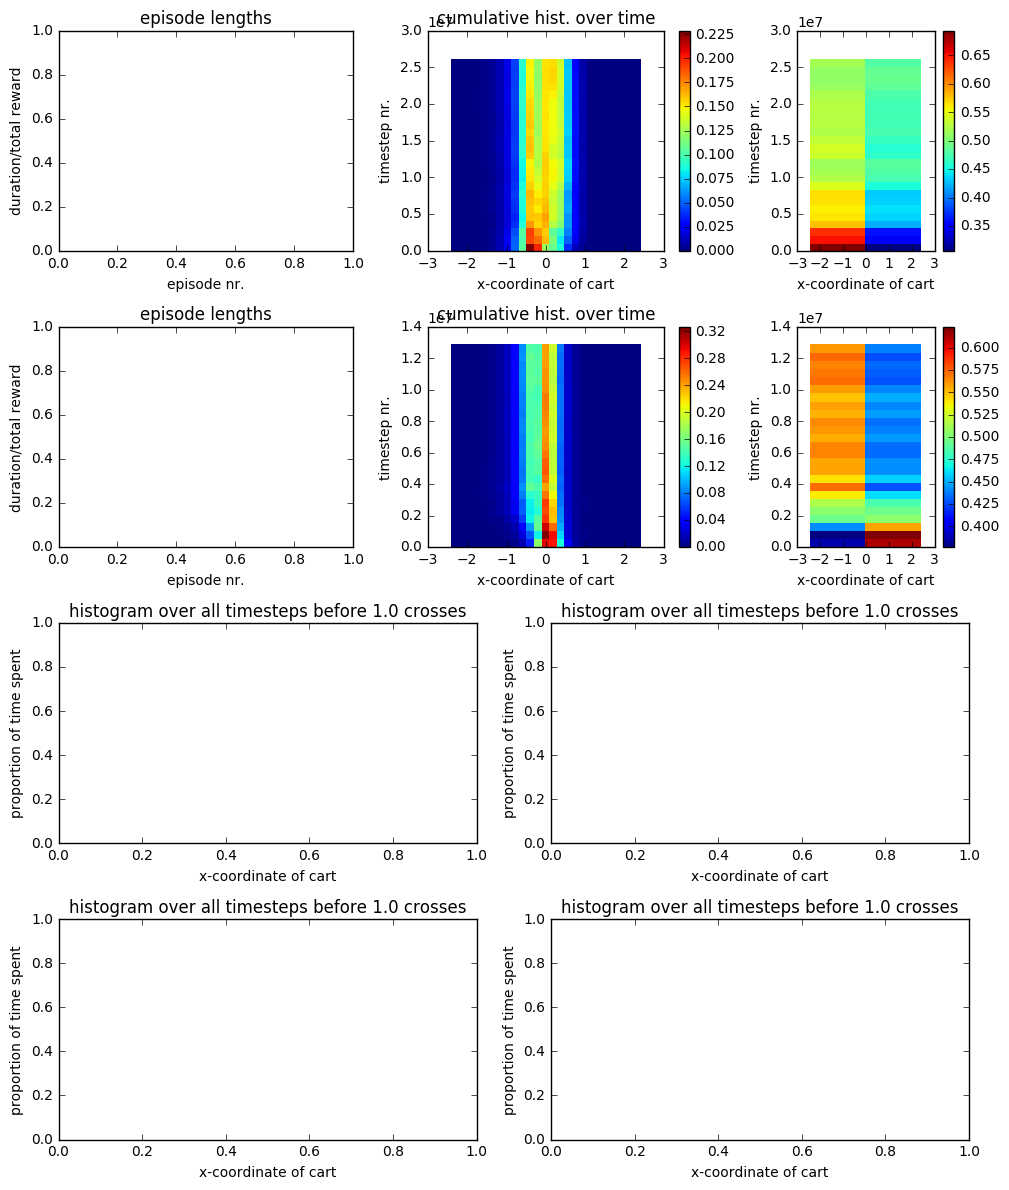

In [133]:
fig

In [41]:
se.plot_xs_hist(interruptibility.mask_after_cross(xs).compressed(), ax, label='uninterrupted')

In [66]:
with saveloaddata.load_res('Sarsa-rand-tiebreak', 'interrupted', data_dir_p) as res:
    before_cross_int = interruptibility.mask_after_cross(interruptibility.rsxs2nparray(*res))

In [42]:
   
se.plot_xs_hist(interruptibility.mask_after_cross(xs).compressed(), ax, label='interrupted')

In [ ]:
ax.legend()

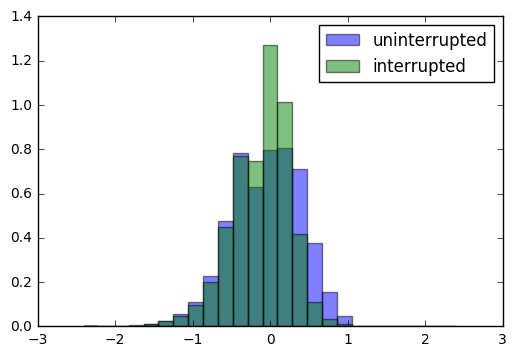

In [43]:
fig

In [193]:
stats_experiments.plot_mean_std_change(before_cross_unint, label='uninterrupted')
stats_experiments.plot_mean_std_change(before_cross_int, label='interrupted')

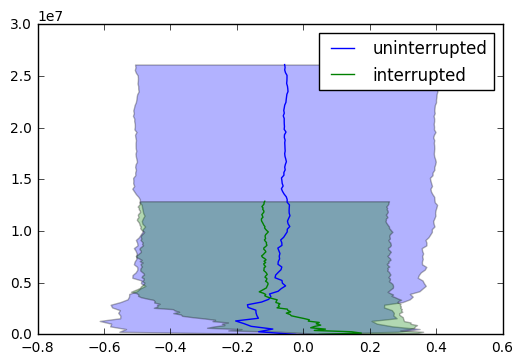

In [194]:
plt.legend()
plt.show()

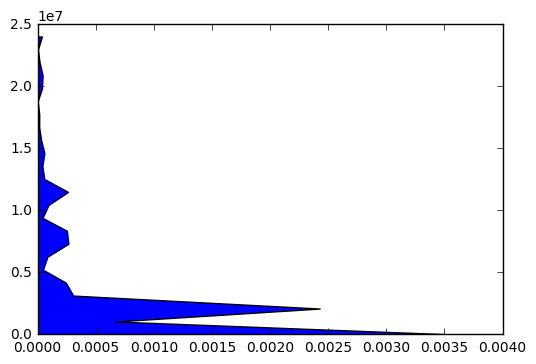

In [174]:
se.plot_jsd_devel(before_cross_unint)
plt.show()

In [172]:
%debug

> /home/erle/.local/lib/python2.7/site-packages/matplotlib/axes/_axes.py(4771)fill_betweenx()
   4769 
   4770         if not (y.shape == x1.shape == x2.shape == where.shape):
-> 4771             raise ValueError("Argument dimensions are incompatible")
   4772 
   4773         mask = reduce(ma.mask_or, [ma.getmask(a) for a in (y, x1, x2)])

ipdb> y
masked_array(data = [0.0 1044651.76 2089303.52 3133955.2800000003 4178607.04 5223258.8
 6267910.5600000005 7312562.32 8357214.08 9401865.84 10446517.6 11491169.36
 12535821.120000001 13580472.88 14625124.64 15669776.4 16714428.16
 17759079.92 18803731.68 19848383.44 20893035.2 21937686.96 22982338.72
 24026990.48 25071642.240000002],
             mask = [False False False False False False False False False False False False
 False False False False False False False False False False False False
 False],
       fill_value = 1e+20)

ipdb> q


In [14]:
fig, ax = plt.subplots()
ax.set_xscale('log')
se.plot_jsd_comp_final(before_cross_unint, ax=ax)

In [9]:
ax.set_xlim([0.0, 0.03])

(0.0, 0.03)

In [15]:
ax.get_xlim()

(1.0000000000000001e-05, 0.10000000000000001)

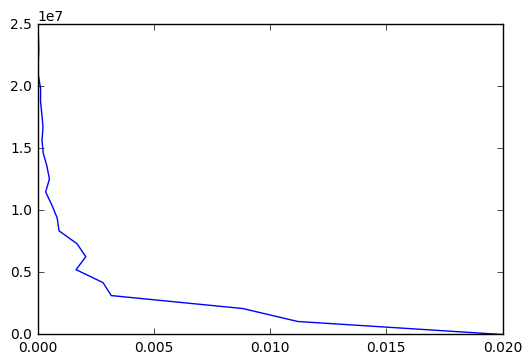

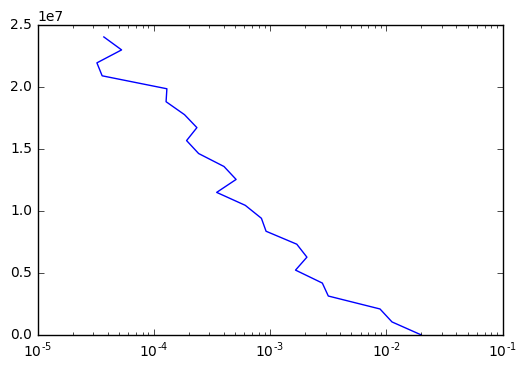

In [16]:
plt.show()

Interesting: Interruptions don't move the whole thing to the left, but limit variance.

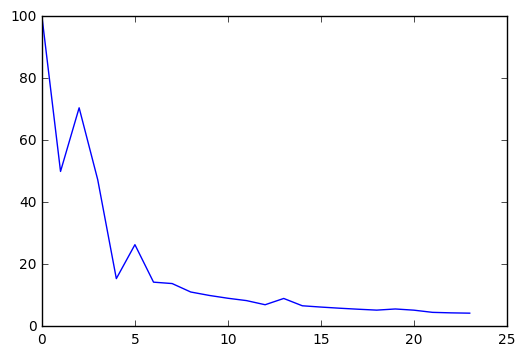

In [52]:
fig, ax = plt.subplots()
mesh = stats_experiments.plot_xss_cum_hist_change(xs, ax, bins=25)
#plt.colorbar(mesh)
plt.show()

In [7]:
del xs

In [54]:
p = '../data/Sarsa-disc-uninterrupted-xe-170221003432.pickle'
with open(p, 'rb') as f:
    res = pickle.load(f)
    
with open(p, 'wb') as f:
    pickle.dump(res[0:2], f)